In [29]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

In [30]:
#f = r.TFile("./data/gm2offline_ana.root")
f = r.TFile("./data/gm2offline_ana_15466651_15942.00294.root")
f.cd("stdp")
f.ls()

TFile**		./data/gm2offline_ana_15466651_15942.00294.root	
 TFile*		./data/gm2offline_ana_15466651_15942.00294.root	
  TDirectoryFile*		stdp	stdp (CaloSTDPHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirectoryFile	cal

In [31]:
t = f.Get("stdp").Get("eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries : 29001387 : Total =      2262395943 bytes  File  Size =  966411844 *
*        :          : Tree compression factor =   2.34                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries : 29001387 : Total  Size=  116020067 bytes  File Size  =     579216 *
*Baskets :      145 : Basket Size=   25600000 bytes  Compression= 200.30     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries : 29001387 : Total  Size=  116020615 bytes  File Size  =     579612 *
*Baskets :      146 : Basket Size=   25600000 bytes  Compression= 200.16     *
*...................................................

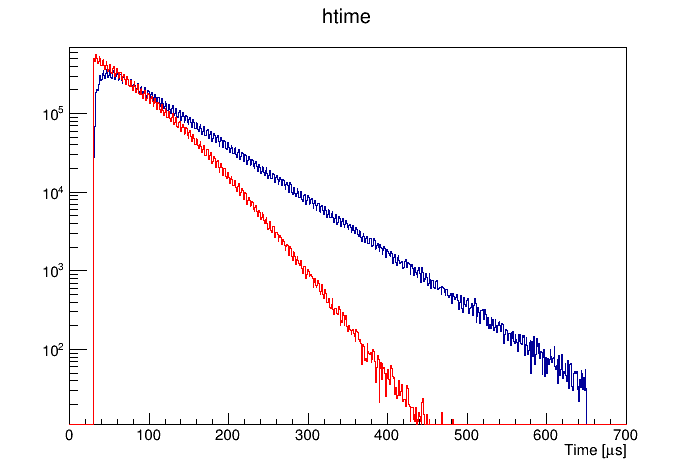

In [32]:
c = r.TCanvas()

htime = r.TH1D("htime","htime; Time [#mus]",700,0,700)
t.Draw("time*1.25/1000.>>htime","","goff")

htime2 = r.TH1D("htime2","htime2; Time [#mus]",700,0,700)
t.Draw("cluster2_time*1.25/1000.>>htime2","","goff")
htime2.SetLineColor(2)

htime.Draw()
htime2.Draw("SAME")

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

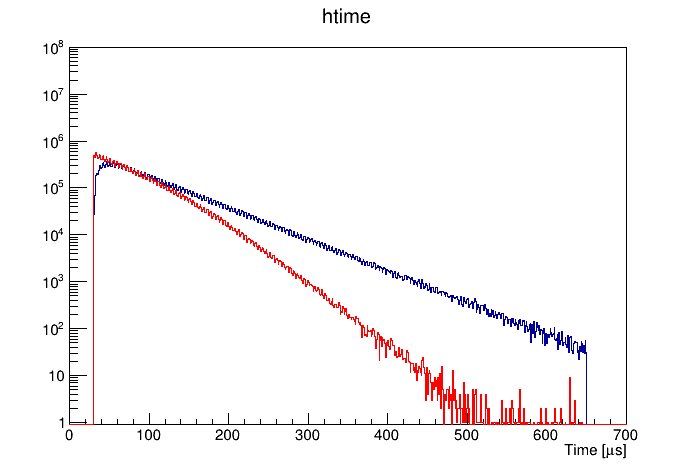

In [33]:
c = r.TCanvas()
htime.Draw()
htime2.Draw("SAME")

htime.GetYaxis().SetRangeUser(0.9,100000000)
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat = r.TH1D("hdeltat","hdelta; #deltat [#mus]",710,-10,700)
t.Draw("time*1.25/1000. - cluster2_time*1.25/1000.>>hdeltat","","goff")


hdeltat.Draw()

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogy()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat = r.TH1D("hdeltat","#deltat vs. t_{late} --- All Xtals; #deltat [c.t]",150,0,150)
t.Draw("time - cluster2_time>>hdeltat","","goff")


hdeltat.Draw("")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat = r.TH1D("hdeltat","#deltat vs. t_{late} --- All Xtals; #deltat [c.t]",150,0,150)
t.Draw("time - cluster2_time>>hdeltat","cluster2_energy > 500 && energy > 500 && xtalNum == 35","goff")


hdeltat.Draw("")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

t.Draw("energy:time - cluster2_time>>hist(150,0,150,1000,0,3000)","cluster2_energy > 500 && energy > 500","colz")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat_t = r.TH2D("hdeltat_t","#deltat vs. t_{late} --- All Xtals; #deltat [#mus]; t_{late} [#mus]",710,-10,700,710,-10,700)
t.Draw("time*1.25/1000.:time*1.25/1000. - cluster2_time*1.25/1000.>>hdeltat_t","","goff")


hdeltat_t.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()
hdeltat_t.GetXaxis().SetRangeUser(0,100)
hdeltat_t.GetYaxis().SetRangeUser(0,100)
hdeltat_t.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat_t = r.TH2D("hdeltat_t","#deltat vs. t_{late} --- All Xtals; #deltat [#mus]; t_{late} [#mus]",710,-10,700,710,-10,700)
t.Draw("time*1.25/1000.:time*1.25 - cluster2_time*1.25>>hdeltat_t","","goff")


hdeltat_t.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
#c.SetLogy()
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltat_t.Draw("COLZ")

hdeltat_t.GetYaxis().SetRangeUser(29,700)
#c.SetLogy()
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hdeltaE_t = r.TH2D("hdeltaE_t","#deltat vs. #deltaE --- All Xtals; #deltat [#mus]; #deltaE [MeV]",710,-10,700,6000,-3000,3000)
t.Draw("energy - cluster2_energy:time*1.25/1000. - cluster2_time*1.25/1000.>>hdeltaE_t","","goff")


hdeltaE_t.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()
hdeltaE_t.Draw("COLZ")

hdeltaE_t.GetXaxis().SetRangeUser(0,10)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hE_deltat = r.TH2D("hE_deltat","#deltat vs. E_{late} --- All Xtals; #deltat [ns]; E_{late} [MeV]",1500,0,150,6000,0,3000)
t.Draw("energy:time*1.25 - cluster2_time*1.25>>hE_deltat","","goff")


hE_deltat.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()
hE_deltat.Draw("COLZ")

hE_deltat.GetXaxis().SetRangeUser(0,10)
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()

hE_deltat = r.TH2D("hE_deltat","#deltat vs. E_{late} --- All Xtals [E_{i-1} > 500]; #deltat [ns]; E_{late} [MeV]",1500,0,150,6000,0,3000)
t.Draw("energy:time*1.25 - cluster2_time*1.25>>hE_deltat","cluster2_energy > 500","goff")


hE_deltat.Draw("COLZ")

#htime.GetYaxis().SetRangeUser(0.9,10000)
c.SetLogz()
c.Draw()

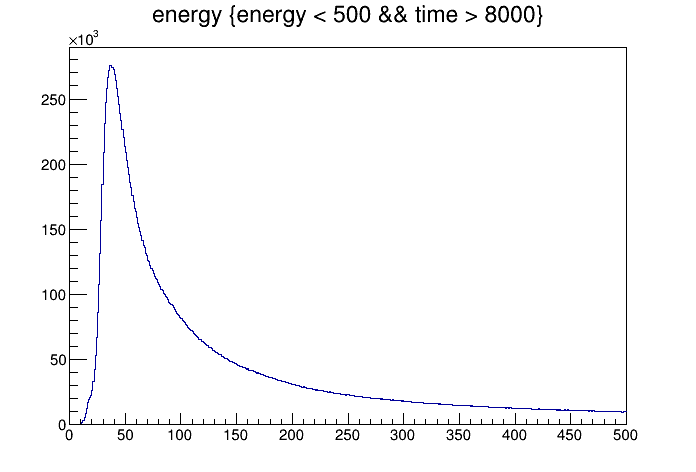

In [35]:
c = r.TCanvas()
t.Draw("energy>>hist(500,0,500)","energy < 500 && time > 8000","")
c.Draw()

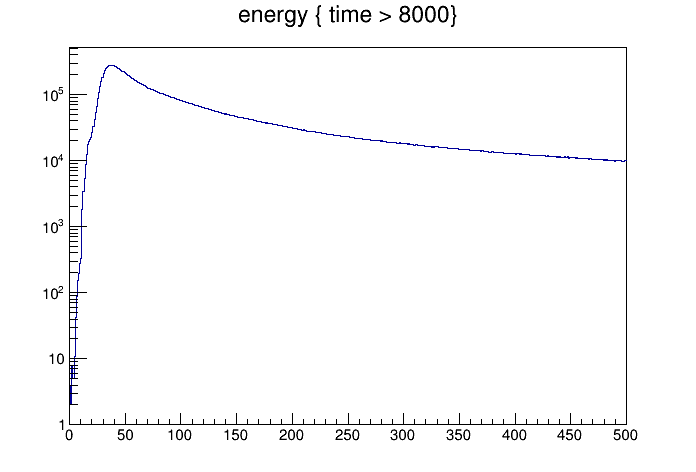

In [38]:
c = r.TCanvas()
t.Draw("energy>>hist(500,0,500)"," time > 8000","")
c.SetLogy()
c.Draw()

--- 

### Now lets break this down into energy bins

In [15]:
binsize = 10
Eearlys = [x for x in range(200,3000,binsize*10)]
print(Eearlys)

[200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900]


In [16]:
E_v_deltaT_hists = []

for Eearly in Eearlys:
    h = r.TH2D("h","E_{late} vs. #deltat for E_{early} = "+str(Eearly)+" Mev - "+str(Eearly+binsize)+" MeV; #deltat [c.t.]; E_{late} [MeV]",
              300,0,150,620,0,3100)
    
    t.Draw("energy:(time-cluster2_time)>>h","cluster2_energy > "+str(Eearly)+" && cluster2_energy < "+str(Eearly + binsize)
           ,"goff")
    
    E_v_deltaT_hists.append(h.Clone("h"+str(Eearly)+"_"+str(Eearly+binsize)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Appe

In [17]:
for h in E_v_deltaT_hists:
    print(h.GetEntries(),"   ", h)

301935.0     <ROOT.TH2D object ("h200_210") at 0x7fffcd2a1eb0>
176854.0     <ROOT.TH2D object ("h300_310") at 0x7fffcd2ca740>
125288.0     <ROOT.TH2D object ("h400_410") at 0x7fffcd2a1890>
97758.0     <ROOT.TH2D object ("h500_510") at 0x7fffcd296d70>
80088.0     <ROOT.TH2D object ("h600_610") at 0x7fffcbea9210>
68266.0     <ROOT.TH2D object ("h700_710") at 0x7fffcd2ad9b0>
60035.0     <ROOT.TH2D object ("h800_810") at 0x7fffcd2b34f0>
53583.0     <ROOT.TH2D object ("h900_910") at 0x7fffcd294700>
48224.0     <ROOT.TH2D object ("h1000_1010") at 0x7fffcd2942f0>
43729.0     <ROOT.TH2D object ("h1100_1110") at 0x7fffcd290400>
39993.0     <ROOT.TH2D object ("h1200_1210") at 0x7fffcd28fff0>
36727.0     <ROOT.TH2D object ("h1300_1310") at 0x7fffcd2b9510>
33414.0     <ROOT.TH2D object ("h1400_1410") at 0x7fffcd2b9100>
30099.0     <ROOT.TH2D object ("h1500_1510") at 0x7fffcd28e900>
27025.0     <ROOT.TH2D object ("h1600_1610") at 0x7fffcd28ed10>
23591.0     <ROOT.TH2D object ("h1700_1710") at 0x7ff

for i, h in enumerate(E_v_deltaT_hists):
    c = r.TCanvas("c","c",1100,1000)
    h.Draw("colz")
    c.SetLogz()
    c.Draw()
    c.Print("./images/stdp_E_v_deltaT_"+str(Eearlys[i]).zfill(4)+".png")

In [18]:
c = r.TCanvas("c","c",6000,12000)
width = 3
c.Divide(width,int(np.ceil(len(E_v_deltaT_hists)/width)))
for i, h in enumerate(E_v_deltaT_hists):
    c.cd(i+1)
    h.Draw("COLZ")
    h.GetZaxis().SetRangeUser(0.1,1000)
    r.gPad.SetLogy()
    r.gPad.SetLogz()
    
c.Draw()

--- 

### Now lets break this down into energy bins for a single xtal

In [20]:
E_v_deltaT_hists_calo = []
calo = 1
xtal = 35


for Eearly in Eearlys:
    h = r.TH2D("h","E_{late} vs. #deltat for E_{early} = "+str(Eearly)+" Mev - "+str(Eearly+binsize)+" MeV; #deltat [c.t.]; E_{late} [MeV]",
              300,0,150,620,0,3100)
    
    t.Draw("energy:(time-cluster2_time)>>h"
           ,"caloNum == "+str(calo)+" && xtalNum == "+str(xtal)+" && cluster2_energy > "+str(Eearly)+" && cluster2_energy < "+str(Eearly + binsize)
           ,"goff")
    
    E_v_deltaT_hists_calo.append(h.Clone("h"+str(Eearly)+"_"+str(Eearly+binsize)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TDirectoryFile::Appe

In [21]:
for h in E_v_deltaT_hists_calo:
    print(h.GetEntries(),"   ", h)

1816.0     <ROOT.TH2D object ("h200_210") at 0x7f7d00281dd0>
724.0     <ROOT.TH2D object ("h300_310") at 0x7f7d00281950>
487.0     <ROOT.TH2D object ("h400_410") at 0x7ffffb82f080>
450.0     <ROOT.TH2D object ("h500_510") at 0x7ffffba5a640>
369.0     <ROOT.TH2D object ("h600_610") at 0x7ffffba530e0>
316.0     <ROOT.TH2D object ("h700_710") at 0x7ffffba53870>
279.0     <ROOT.TH2D object ("h800_810") at 0x7ffffb8af8b0>
254.0     <ROOT.TH2D object ("h900_910") at 0x7f7d0029d860>
278.0     <ROOT.TH2D object ("h1000_1010") at 0x7f7cf4c94710>
226.0     <ROOT.TH2D object ("h1100_1110") at 0x7f7cf4e20b60>
208.0     <ROOT.TH2D object ("h1200_1210") at 0x7f7cf4c95060>
195.0     <ROOT.TH2D object ("h1300_1310") at 0x7f7d002847a0>
181.0     <ROOT.TH2D object ("h1400_1410") at 0x7f7cf4c8f720>
144.0     <ROOT.TH2D object ("h1500_1510") at 0x7f7cf4e21460>
131.0     <ROOT.TH2D object ("h1600_1610") at 0x7ffffb8d2ec0>
109.0     <ROOT.TH2D object ("h1700_1710") at 0x7f7d0029e0b0>
112.0     <ROOT.TH2D ob

In [22]:
c = r.TCanvas("c","c",6000,12000)
width = 3
c.Divide(width,int(np.ceil(len(E_v_deltaT_hists_calo)/width)))
for i, h in enumerate(E_v_deltaT_hists_calo):
    c.cd(i+1)
    h.Draw("COLZ")
    h.GetZaxis().SetRangeUser(0.1,1000)
    r.gPad.SetLogy()
    r.gPad.SetLogz()
    
c.Draw()